In [9]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


### Generate Random Data (or Input Manually)

In [10]:
# Generate a random dataset with 5 features and 100 samples
np.random.seed(42)
X = np.random.randn(100, 5)

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383


### Compute Covariance Matrix

In [11]:
# Covariance matrix: 5x5 (since 5 features)
cov_matrix = np.cov(df.T)

cov_matrix


array([[ 0.81063422, -0.14480896,  0.03974684, -0.08797673, -0.12188116],
       [-0.14480896,  0.96847272,  0.11887371,  0.03608656,  0.06034235],
       [ 0.03974684,  0.11887371,  0.9681448 ,  0.00804846,  0.04519932],
       [-0.08797673,  0.03608656,  0.00804846,  0.92074693,  0.01889852],
       [-0.12188116,  0.06034235,  0.04519932,  0.01889852,  1.15091288]])

Covariance Matrix Interpretation

A covariance matrix stores pairwise covariance between variables.

cov[i][j] > 0 → features increase together

cov[i][j] < 0 → when one increases, the other decreases

cov[i][j] = 0 → no linear relationship

### Compute Eigenvalues & Eigenvectors

In [12]:
# Eigen decomposition of covariance matrix
eigen_values, eigen_vectors = eig(cov_matrix)

eigen_values, eigen_vectors


(array([0.66582554, 1.26528496, 0.87353896, 0.97435577, 1.03990633]),
 array([[ 0.79663295,  0.36002699, -0.23633513,  0.42414635, -0.00144754],
        [ 0.4449592 , -0.45253955,  0.49953211, -0.17517712, -0.56302745],
        [-0.31002151, -0.25248232, -0.42231723,  0.55926507, -0.59077075],
        [ 0.2094565 , -0.18653311, -0.71218153, -0.63230474, -0.1196727 ],
        [ 0.16553515, -0.75302497, -0.09517877,  0.27717531,  0.56539045]]))

Eigenvalues (sorted, largest → smallest)
These represent the variance explained by each principal component.

Eigenvectors (sorted)
Each column = one eigenvector (principal component).
Each row = contribution of each Feature_i to that component.

### Sort Eigenvalues in Descending Order

Eigenvalues & Eigenvectors Meaning

Eigenvalues represent "amount of variance" captured by each principal direction.

Eigenvectors represent the actual directions (principal components).

Larger eigenvalue → more important direction.

Sorting eigenvalues helps identify top contributing features (used in PCA).

In [13]:
# Sorting eigenvalues and eigenvectors for interpretability
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_idx]
eigen_vectors_sorted = eigen_vectors[:, sorted_idx]

eigen_values_sorted


array([1.26528496, 1.03990633, 0.97435577, 0.87353896, 0.66582554])

Interpretation of Sorted Eigenvalues

The largest eigenvalue corresponds to the principal direction with maximum variance.

If the first few eigenvalues are much larger, data has strong patterns → PCA works well.

### Variance Explained (Useful for PCA Interpretations)

In [14]:
total_variance = np.sum(eigen_values_sorted)
explained_variance_ratio = eigen_values_sorted / total_variance

explained_variance_ratio


array([0.26256655, 0.21579693, 0.20219416, 0.18127308, 0.13816928])

Variance Explained (%)

Shows what percentage of dataset variance is captured by each eigenvalue.

Example: If the first eigenvalue explains 70%, the data is strongly aligned in one direction.

### Plot Eigenvalues (Scree Plot)

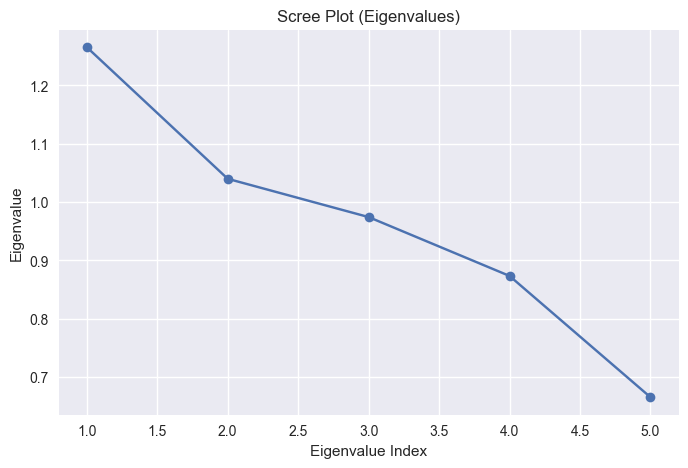

In [15]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigen_values_sorted)+1), eigen_values_sorted, marker='o')
plt.title("Scree Plot (Eigenvalues)")
plt.xlabel("Eigenvalue Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()


Scree Plot Interpretation

Sharp drop → strong primary components

Smooth decay → no strong dominant directions

### Display Eigenvectors in a Table

In [16]:
eig_df = pd.DataFrame(
    eigen_vectors_sorted,
    columns=[f"Eigenvector_{i+1}" for i in range(len(eigen_values))],
    index=[f"Feature_{i+1}" for i in range(X.shape[1])]
)

eig_df


,Eigenvector_1,Eigenvector_2,Eigenvector_3,Eigenvector_4,Eigenvector_5
Feature_1,0.360027,-0.001448,0.424146,-0.236335,0.796633
Feature_2,-0.452540,-0.563027,-0.175177,0.499532,0.444959
Feature_3,-0.252482,-0.590771,0.559265,-0.422317,-0.310022
Feature_4,-0.186533,-0.119673,-0.632305,-0.712182,0.209457
Feature_5,-0.753025,0.565390,0.277175,-0.095179,0.165535
